In [9]:
# load data from tsp file
import numpy as np

tsp_data = np.loadtxt('C:\IMT_2023-2024\ISEN\Enseignement\TSPDataset\\gr17.2085.tsp')
print(tsp_data.shape)

(17, 17)


In [10]:
import math
import queue

def pickneighbor(s,length):
    index = np.random.choice(range(length), 2, replace=False) # pick randomly 2 indices in [0,length]
    s[index[0]],s[index[1]] = s[index[1]],s[index[0]] # swap values located at these indices
    return s

def initial_solution(length):
    s = np.random.choice(range(length), length, replace=False) #cities in [0,length]
    return s

def objectivefunction(s):
    cost = 0
    for i in range(s.shape[0]-1):
        cost = cost + tsp_data[s[i]][s[i+1]]
    
    cost = cost + tsp_data[s[-1]][s[0]]
    return cost
        
def accept_solution(delta, T): 
    flags = ['yes','no']
    prob = math.exp(-abs(delta)/T) # probability of acceptance
    decision = np.random.choice(flags, 1, p=[prob, 1-prob]) # select yes or no according to p
    if decision == 'yes':
        return True
    else:
        return False
    
def geometric_cooling(T, alpha):
    return T*alpha

In [11]:
costs_hist = []

# random initial solution and its cost
length_s = 17
s = initial_solution(length_s) #np.random.choice(range(length_s), length_s, replace=False) #cities in [0,length_s]
cost_s = objectivefunction(s)

# save history of costs
costs_hist.append(cost_s)

# consider solution s as the best solution for now
best_s = np.copy(s) # hard copy
best_cost = cost_s

# test with T= 10 and internal_it = 1
T = 500 # max temperature

while T>1:
    
    internal_it = 0
    while (internal_it <5):
        # pick a random neighbor and calculate its cost
        s_neighbor = pickneighbor(np.copy(s),length_s)
        cost_neighbor = objectivefunction(s_neighbor)
    
        # calculate difference of cost
        delta = cost_s - cost_neighbor
    
        if delta >=0: # neighbor is better than current solution s
            s = np.copy(s_neighbor) # accept new solution
            cost_s = cost_neighbor # save its cost
            # becareful here, need to check best_cost before update, since best_s can come from degraded solution
            if (best_cost > cost_s): 
                best_s = np.copy(s_neighbor) # update best solution
                best_cost = cost_neighbor 
            costs_hist.append(cost_neighbor) # save history of costs
        else: # current solution s is still better than its neighbor
            if (accept_solution(delta, T)): # if Ture then accept solution degradation
                s = np.copy(s_neighbor)
                cost_s = cost_neighbor
                costs_hist.append(cost_neighbor)
        
        internal_it = internal_it +1

    T = geometric_cooling(T, 0.99)

    
print ('best sol, cost {} {}'.format(best_s,best_cost))


best sol, cost [ 6 12  3  0 15 11  8  4  1  9 10  2 14 13 16  5  7] 2085.0


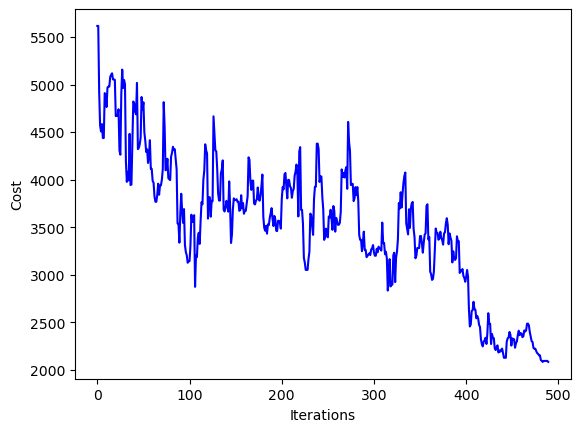

In [12]:
import matplotlib.pyplot as plt

plt.plot(costs_hist, 'b')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

C:\Users\halim.benhabiles\AppData\Local\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\halim.benhabiles\AppData\Local\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


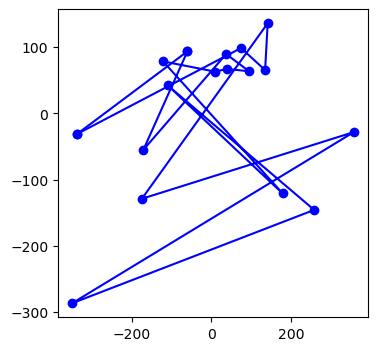

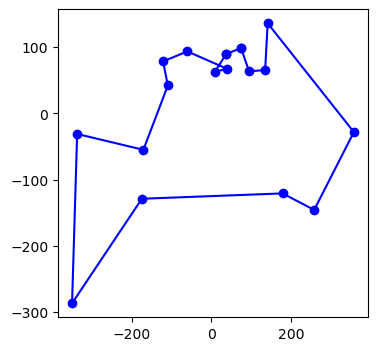

In [13]:
# convert distance matrix between cities into coordinates of cities 
from sklearn import manifold  # multidimensional scaling


mds_model = manifold.MDS(n_components=2, random_state=length_s,
                             dissimilarity='precomputed')
mds_fit = mds_model.fit(tsp_data)
mds_coords = mds_model.fit_transform(tsp_data)

# plot a random solution over cities
s = initial_solution(length_s)
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(mds_coords[s, 0], mds_coords[s, 1], 'b-o')
plt.plot([mds_coords[s[0], 0], mds_coords[s[-1], 0]],
         [mds_coords[s[0], 1], mds_coords[s[-1], 1]], 'b-o')


# plot the best solution over cities
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(mds_coords[best_s, 0], mds_coords[best_s, 1], 'b-o')
plt.plot([mds_coords[best_s[0], 0], mds_coords[best_s[-1], 0]],
         [mds_coords[best_s[0], 1], mds_coords[best_s[-1], 1]], 'b-o')